# K means from scratch avec Python

## Importation des packages

In [1]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

## Création du jeu de données

In [2]:
mu, sigma = 0, 0.25 # mean and standard deviation
x_train_1_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 0, 0.25 # mean and standard deviation
x_train_1_2 = np.random.normal(mu, sigma, 100)

mu, sigma = 1, 0.25 # mean and standard deviation
x_train_2_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 1, 0.25 # mean and standard deviation
x_train_2_2 = np.random.normal(mu, sigma, 100)

mu, sigma = 3, 0.25 # mean and standard deviation
x_train_3_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 1, 0.25 # mean and standard deviation
x_train_3_2 = np.random.normal(mu, sigma, 100)

x_train = np.stack([np.concatenate([x_train_1_1, x_train_2_1, x_train_3_1]),
                    np.concatenate([x_train_1_2, x_train_2_2, x_train_3_2])], axis=1)

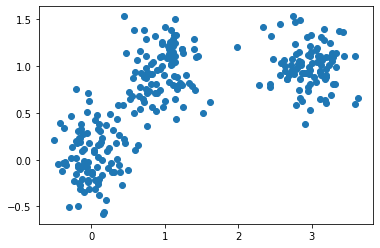

In [3]:
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.show()

## Implémentation du K-means

### Initialisation de la classe

In [4]:
class KMeans:

  def __init__(self, k: int) -> None :
    ''' Fonction d'Initialisation '''
    self.k = k
    self.centroid = None

In [5]:
km = KMeans(2)

print(km.k)
print(km.centroid)

2
None


### Calcul des distances

$$
d(a,b) = \sqrt {\sum ^n_{i=1} (a_i - b_i)^2}
$$


$a$ et $b$ sont deux points dans un plan euclidien de dimension $n$

$a_i$ et $b_i$ sont deux vecteurs depuis l'origine jusqu'au point $a$, $b$.

In [6]:
class KMeans:

  def __init__(self, k: int) -> None :
    ''' La fonction d'Initialisation '''
    self.k = k
    self.centroid = None

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Calculer la distance euclidienne entre les deux vecteurs '''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

In [7]:
np.random.seed(123)
a = np.random.random((100, 1))
b = np.random.random((100, 1))

KMeans.euclidean_distance(a, b).shape

(100,)

### Calculer les distances avec les centroïds

In [8]:
class KMeans:

  def __init__(self, k: int) -> None :
    ''' La fonction d'Initialisation '''
    self.k = k
    self.centroid = None

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Calculer la distance euclidienne entre les deux vecteurs '''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def compute_distance(self, x: np.ndarray) -> np.ndarray :
    ''' Calculer la distance entre x et le centroid'''

    # Apply the distance between x and every centroid
    distance_matrix = np.array(list(map(lambda cent : KMeans.euclidean_distance(x, cent),
                                        self.centroid)))

    # Reshape the matrix to have the number of observations in the first dimension
    return np.swapaxes(distance_matrix, 0, 1)

In [9]:
km = KMeans(2)

rand_index = np.random.choice(np.arange(0, x_train.shape[0]),
                              size=2,
                              replace=False)

km.centroid = x_train[rand_index]

distance_matrix = km.compute_distance(x_train)

print(distance_matrix.shape)

(300, 2)


# Assigner les observations au centroïd le plus proche

In [10]:
class KMeans:

  def __init__(self, k: int) -> None :
    ''' La fonction d'Initialisation '''
    self.k = k
    self.centroid = None

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Calculez la distance euclidienne entre les deux vecteurs '''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def compute_distance(self, x: np.ndarray) -> np.ndarray :
    ''' Calculez la distance entre x et le centroid'''

    # Apply the distance between x and every centroid
    distance_matrix = np.array(list(map(lambda cent : KMeans.euclidean_distance(x, cent),
                                        self.centroid)))
    # Reshape the matrix to have the number of observations in the first dimension
    return np.swapaxes(distance_matrix, 0, 1)

  def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
    ''' Obtenez le cluster à partir de la matrice de distances entre les centroïdes et les observations'''

    # Return the centroid with the minimum distance for every observations
    return np.argmin(dist, axis=1)

In [11]:
km = KMeans(2)

np.random.seed(123)
rand_index = np.random.choice(np.arange(0, x_train.shape[0]),
                              size=2,
                              replace=False)

km.centroid = x_train[rand_index]

distance_matrix = km.compute_distance(x_train)

cluster_vector = km.predict_cluster(distance_matrix)

print(cluster_vector)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


## Visualisation du modèle

In [12]:
class KMeans:

    def __init__(self, k: int) -> None:
        ''' Initialization function / Fonction d'initialisation '''
        self.k = k
        self.centroid = None

    @staticmethod
    def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
        ''' Compute the euclidean distance between two vectors / Calculer la distance euclidienne entre deux vecteurs '''
        return np.sqrt(np.sum(np.power(a - b, 2), axis=1))

    def compute_distance(self, x: np.ndarray) -> np.ndarray:
        ''' Compute the distance between x and the centroid / Calculer la distance entre x et le centroïde '''

        # Apply the distance between x and every centroid / Appliquer la distance entre x et chaque centroïde
        distance_matrix = np.array(list(map(lambda cent: KMeans.euclidean_distance(x, cent),
                                             self.centroid)))
        # Reshape the matrix to have the number of observations in the first dimension / Reshape la matrice pour avoir le nombre d'observations dans la première dimension
        return np.swapaxes(distance_matrix, 0, 1)

    def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
        ''' Get the cluster from distance matrix between centroid and observations / Obtenir le cluster à partir de la matrice de distance entre le centroïde et les observations '''

        # Return the centroid with the minimum distance for every observations / Retourner le centroïde avec la distance minimale pour chaque observation
        return np.argmin(dist, axis=1)

    def plot_model(self, x: np.ndarray, pred: np.ndarray) -> None:
        ''' Trace une visualisation du modèle sur le jeu de données d'entraînement / Plots a visualization of the model on the training dataset '''
        for k in range(self.k):
            plt.scatter(x[pred == k, 0], x[pred == k, 1])  # Scatter plot for each cluster
            plt.scatter(self.centroid[k, 0], self.centroid[k, 1], marker="X", s=200)  # Centroid as a large X

        plt.show()

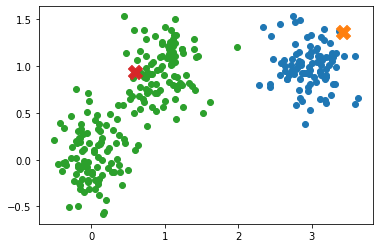

In [13]:
km = KMeans(2)

np.random.seed(123)
rand_index = np.random.choice(np.arange(0, x_train.shape[0]),
                              size=2,
                              replace=False)

km.centroid = x_train[rand_index]

distance_matrix = km.compute_distance(x_train)

cluster_vector = km.predict_cluster(distance_matrix)

km.plot_model(x_train, cluster_vector)

# Prédiction des données

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:

    def __init__(self, k: int) -> None:
        ''' Fonction d'initialisation '''
        self.k = k  # Nombre de clusters
        self.centroid = None  # Centroid initialisé à None

    @staticmethod
    def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
        ''' Calculer la distance euclidienne entre deux vecteurs '''
        return np.sqrt(np.sum(np.power(a - b, 2), axis=1))  # Distance euclidienne

    def compute_distance(self, x: np.ndarray) -> np.ndarray:
        ''' Calculer la distance entre x et le centroïde '''

        # Appliquer la distance entre x et chaque centroïde
        distance_matrix = np.array(list(map(lambda cent: KMeans.euclidean_distance(x, cent),
                                             self.centroid)))
        # Reshaper la matrice pour avoir le nombre d'observations dans la première dimension
        return np.swapaxes(distance_matrix, 0, 1)  # Échange les axes pour correspondre aux observations

    def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
        ''' Obtenir le cluster à partir de la matrice de distance entre le centroïde et les observations '''

        # Retourner le centroïde avec la distance minimale pour chaque observation
        return np.argmin(dist, axis=1)  # Index des centroïdes les plus proches

    def plot_model(self, x: np.ndarray, pred: np.ndarray) -> None:
        ''' Trace une visualisation du modèle sur le jeu de données d'entraînement '''
        for k in range(self.k):
            plt.scatter(x[pred == k, 0], x[pred == k, 1])  # Tracer les points des observations
            plt.scatter(self.centroid[k, 0], self.centroid[k, 1], marker="X", s=200)  # Tracer les centroïdes

        plt.title("Visualisation des clusters")  # Titre du graphique
        plt.xlabel("Feature 1")  # Étiquette pour l'axe des x
        plt.ylabel("Feature 2")  # Étiquette pour l'axe des y
        plt.show()  # Afficher le graphique

    def predict(self, x: np.ndarray) -> np.ndarray:
        ''' Prédire pour chaque observation à quel cluster elle appartient '''

        # Calculer la distance entre les observations et le centroïde
        distance_matrix = self.compute_distance(x)

        # Prédire à quel cluster appartient chaque observation
        cluster_vector = self.predict_cluster(distance_matrix)  # Vector des clusters prédits
        return cluster_vector  # Retourner le vecteur des clusters

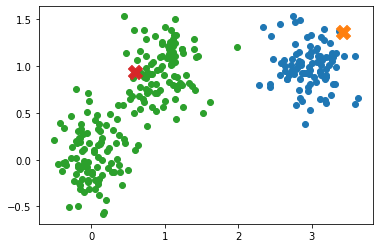

In [15]:
km = KMeans(2)

np.random.seed(123)
rand_index = np.random.choice(np.arange(0, x_train.shape[0]),
                              size=2,
                              replace=False)

km.centroid = x_train[rand_index]

pred = km.predict(x_train)


km.plot_model(x_train, pred)

# Calul des centroïdes

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:

    def __init__(self, k: int) -> None:
        ''' Initialization function '''
        self.k = k  # Number of clusters
        self.centroid = None  # Centroid initialized to None

    @staticmethod
    def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
        ''' Compute the euclidean distance between two vectors '''
        return np.sqrt(np.sum(np.power(a - b, 2), axis=1))  # Euclidean distance calculation

    def compute_distance(self, x: np.ndarray) -> np.ndarray:
        ''' Compute the distance between x and the centroid'''

        # Calculate the distance between x and every centroid
        distance_matrix = np.array(list(map(lambda cent: KMeans.euclidean_distance(x, cent),
                                             self.centroid)))
        # Reshape the matrix to have the number of observations in the first dimension
        return np.swapaxes(distance_matrix, 0, 1)

    def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
        ''' Get the cluster from distance matrix between centroid and observations'''

        # Return the centroid with the minimum distance for each observation
        return np.argmin(dist, axis=1)  # Indices of the closest centroids

    def plot_model(self, x: np.ndarray, pred: np.ndarray) -> None:
        ''' Plots a visualization of the model on the training dataset '''
        for k in range(self.k):
            plt.scatter(x[pred == k, 0], x[pred == k, 1])  # Scatter plot of observations
            plt.scatter(self.centroid[k, 0], self.centroid[k, 1], marker="X", s=200)  # Plot centroids

        plt.title("K-Means Clustering Visualization")  # Title for the plot
        plt.xlabel("Feature 1")  # X-axis label
        plt.ylabel("Feature 2")  # Y-axis label
        plt.show()  # Show the plot

    def predict(self, x: np.ndarray) -> np.ndarray:
        ''' Predict for each observation at which cluster they belong '''

        # Compute distance between the observations and the centroid
        distance_matrix = self.compute_distance(x)

        # Predict which cluster each observation belongs to
        cluster_vector = self.predict_cluster(distance_matrix)
        return cluster_vector  # Return the cluster vector

    def compute_centroid(self, cluster_vector: np.ndarray, x: np.ndarray) -> None:
        ''' Compute the new centroid from the actual cluster '''

        for i in np.arange(0, self.centroid.shape[0]):
            # Calculate the mean of all observations belonging to the cluster for each feature
            self.centroid[i, :] = np.mean(x[cluster_vector == i, :], axis=0)


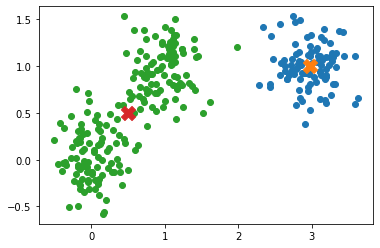

In [17]:
km = KMeans(2)

np.random.seed(123)
rand_index = np.random.choice(np.arange(0, x_train.shape[0]),
                              size=2,
                              replace=False)

km.centroid = x_train[rand_index]

distance_matrix = km.compute_distance(x_train)

cluster_vector = km.predict_cluster(distance_matrix)

km.compute_centroid(cluster_vector, x_train)

km.plot_model(x_train, cluster_vector)

# L'entraînement

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:

    def __init__(self, k: int) -> None:
        ''' Fonction d'initialisation '''
        self.k = k  # Nombre de clusters
        self.centroid = None  # Centroïde initialisé à None

    @staticmethod
    def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
        ''' Calculer la distance euclidienne entre deux vecteurs '''
        return np.sqrt(np.sum(np.power(a - b, 2), axis=1))  # Calcul de la distance euclidienne

    def compute_distance(self, x: np.ndarray) -> np.ndarray:
        ''' Calculer la distance entre x et le centroïde '''

        # Appliquer la distance entre x et chaque centroïde
        distance_matrix = np.array(list(map(lambda cent: KMeans.euclidean_distance(x, cent),
                                             self.centroid)))
        # Reshape la matrice pour avoir le nombre d'observations dans la première dimension
        return np.swapaxes(distance_matrix, 0, 1)

    def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
        ''' Obtenir le cluster à partir de la matrice de distance entre le centroïde et les observations '''

        # Retourner le centroïde avec la distance minimale pour chaque observation
        return np.argmin(dist, axis=1)  # Indices des centroïdes les plus proches

    def plot_model(self, x: np.ndarray, pred: np.ndarray) -> None:
        ''' Trace une visualisation du modèle sur le jeu de données d'entraînement '''
        for k in range(self.k):
            plt.scatter(x[pred == k, 0], x[pred == k, 1])  # Scatter plot des observations
            plt.scatter(self.centroid[k, 0], self.centroid[k, 1], marker="X", s=200)  # Tracer les centroïdes

        plt.title("Visualisation du clustering K-Means")  # Titre du graphique
        plt.xlabel("Caractéristique 1")  # Étiquette de l'axe X
        plt.ylabel("Caractéristique 2")  # Étiquette de l'axe Y
        plt.show()  # Afficher le graphique

    def predict(self, x: np.ndarray) -> np.ndarray:
        ''' Prédire pour chaque observation à quel cluster elle appartient '''

        # Calculer la distance entre les observations et le centroïde
        distance_matrix = self.compute_distance(x)

        # Prédire à quel cluster appartient chaque observation
        cluster_vector = self.predict_cluster(distance_matrix)
        return cluster_vector  # Retourner le vecteur de clusters

    def compute_centroid(self, cluster_vector: np.ndarray, x: np.ndarray) -> None:
        ''' Calculer le nouveau centroïde à partir du cluster actuel '''

        for i in np.arange(0, self.centroid.shape[0]):
            # Calculer la moyenne de toutes les observations appartenant au cluster pour chaque caractéristique
            self.centroid[i, :] = np.mean(x[cluster_vector == i, :], axis=0)

    def fit(self, x: np.ndarray, verbose: bool = False) -> None:
        ''' Entraîner le modèle pour diviser le dataframe x en k clusters optimaux '''

        # Prendre l'index de k observations aléatoires
        rand_index = np.random.choice(np.arange(0, x.shape[0]), size=self.k, replace=False)

        # Initialiser le centroïde avec des observations aléatoires
        self.centroid = x[rand_index]

        last_centroid = np.zeros(self.centroid.shape)

        while not(np.array_equal(last_centroid, self.centroid)):
            last_centroid = np.copy(self.centroid)

            # Prédire à quel cluster appartient chaque observation
            cluster_vector = self.predict(x)

            if verbose:
                self.plot_model(x, cluster_vector)

            # Mettre à jour les valeurs des centroïdes
            self.compute_centroid(cluster_vector, x)


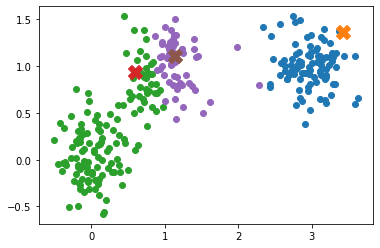

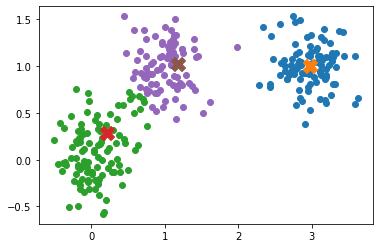

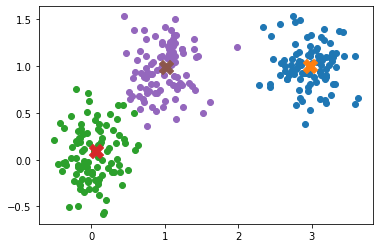

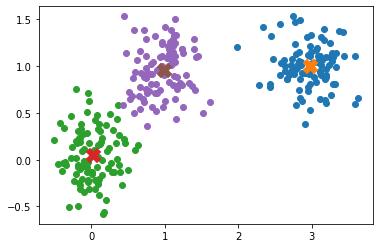

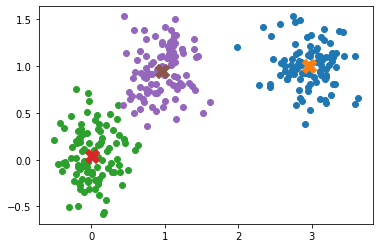

In [19]:
np.random.seed(123)
km = KMeans(3)

km.fit(x_train, verbose=True)

# Choisir le nombre de clusters

In [20]:
class KMeans:

  def __init__(self, k: int) -> None :
    ''' Fonction d'initialisation '''
    self.k = k
    self.centroid = None

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Calcul de la distance euclidienne entre deux vecteurs '''
    return np.sqrt(np.sum(np.power(a-b, 2), axis=1))

  def compute_distance(self, x: np.ndarray) -> np.ndarray:
    ''' Calcul de la distance entre x et le centroïde'''
    # Appliquer la distance entre x et chaque centroïde
    distance_matrix = np.array(list(map(lambda cent : KMeans.euclidean_distance(x, cent), self.centroid)))
    # Reshaper la matrice pour avoir le nombre d'observations dans la première dimension
    return np.swapaxes(distance_matrix, 0, 1)

  def predict_cluster(self, dist: np.ndarray) -> np.ndarray:
    ''' Récupérer le cluster à partir de la matrice de distance entre le centroïde et les observations'''
    # Retourner le centroïde avec la distance minimale pour chaque observation
    return np.argmin(dist, axis=1)

  def plot_model(self, x: np.ndarray, pred: np.ndarray) -> None:
    ''' Trace une visualisation du modèle sur le jeu de données d'entraînement '''
    for k in range(self.k) :
      plt.scatter(x[pred==k, 0], x[pred==k, 1])
      plt.scatter(self.centroid[k, 0], self.centroid[k, 1], marker="X", s=200)
    plt.show()
    
  def predict(self, x: np.ndarray) -> np.ndarray:
      ''' Prédire à quel cluster chaque observation appartient '''
      # Calculer la distance entre les observations et le centroïde
      distance_matrix = self.compute_distance(x)
      # Prédire à quel cluster appartient chaque observation
      cluster_vector = self.predict_cluster(distance_matrix)
      return cluster_vector

  def compute_centroid(self, cluster_vector: np.ndarray, x: np.ndarray) -> None:
    ''' Calculer le nouveau centroïde à partir du cluster actuel '''

    for i in np.arange(0, self.centroid.shape[0]) :
      # Calculer la moyenne des observations appartenant au cluster pour chaque caractéristique
      self.centroid[i, :] = np.mean(x[cluster_vector==i, :], axis=0)

  def fit(self, x: np.ndarray, verbose: bool =False) -> None:
    ''' Entraîner le modèle pour diviser le dataframe x en les meilleurs k clusters. '''

    # Sélectionner les indices de k observations aléatoires
    rand_index = np.random.choice(np.arange(0, x.shape[0]),
                              size=self.k,
                              replace=False)

    # Initialiser les centroïdes avec les observations aléatoires
    self.centroid = x[rand_index]

    last_centroid = np.zeros(self.centroid.shape)

    while not(np.array_equal(last_centroid, self.centroid)):

      last_centroid = np.copy(self.centroid)

      # Prédire à quel cluster appartient chaque observation
      cluster_vector = self.predict(x)

      if verbose :
        self.plot_model(x, cluster_vector)

      # Mettre à jour les valeurs des centroïdes
      self.compute_centroid(cluster_vector, x)

  def compute_distorsion(self, x: np.ndarray) -> float:
      ''' Calculer la distorsion en fonction de l'ensemble d'entraînement et des centroïdes '''

      # Prédire x en utilisant les centroïdes actuels
      pred = self.predict(x)

      # Initialiser sse qui est le score de distorsion
      sse = 0

      for i in np.arange(0, self.centroid.shape[0]) :
        # Calculer la distance entre les observations et leur centroïde
        dist = KMeans.euclidean_distance(x[pred==i], self.centroid[i])

        # Élever toutes les distances au carré
        dist_square = np.power(dist, 2)

        # Somme de toutes les valeurs
        dist_sum_square = np.sum(dist_square)

        # Ajouter le résultat au score de distorsion
        sse += dist_sum_square

      return sse

In [21]:
km = KMeans(2)

km.fit(x_train)

km.compute_distorsion(x_train)

127.3610050031852

In [22]:
np.random.seed(123)
k_range = np.arange(2, 10)
distortion_value = []

for k in k_range:
  km = KMeans(k)

  km.fit(x_train)

  distortion_value = np.append(distortion_value, km.compute_distorsion(x_train))

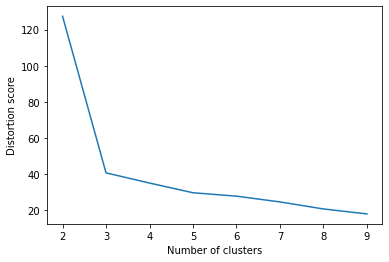

In [23]:
plt.plot(k_range, distortion_value)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion score')
plt.show()

# Modèle final

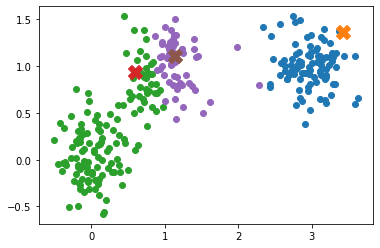

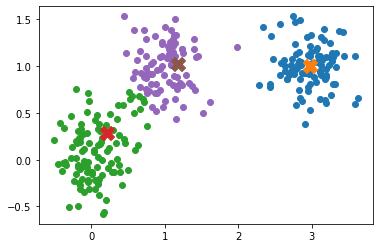

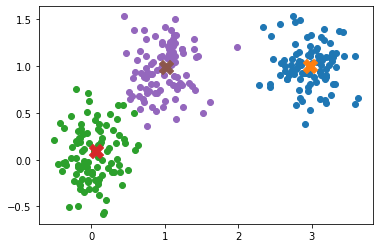

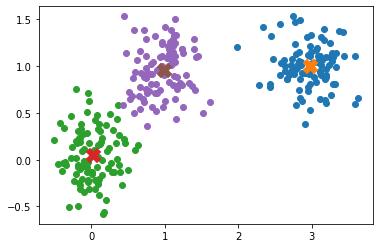

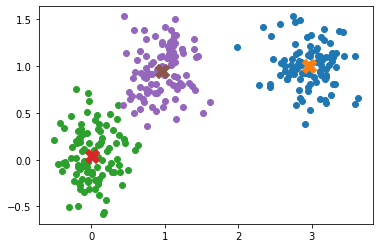

In [27]:
np.random.seed(123)
km = KMeans(3)

km.fit(x_train, verbose=True)

pred = km.predict(x_train)